## Gaussian smoothing:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Gausssian mask:

In [2]:
def mask_gaussian(x, y, sigma_x, sigma_y):
    
    return (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2) + y**2/(2*sigma_y**2))))

### Grid:

In [3]:
sigma_x = 0.2
sigma_y = 0.2

x = np.linspace(-10, 10, 1600)  # Define x coordinates
y = np.linspace(-10, 10, 1600)  # Define y coordinates

X, Y = np.meshgrid(x, y)

Z = mask_gaussian(X, Y, sigma_x, sigma_y)



/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


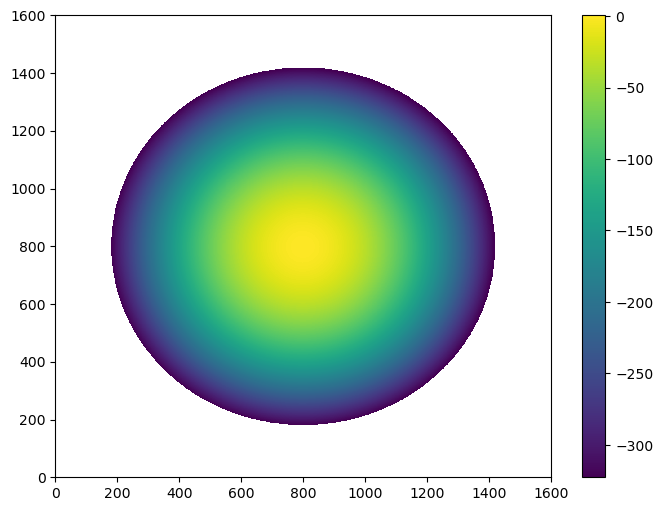

In [4]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(np.log10(Z), shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

In [5]:
import matplotlib.image as mpimg

(1600, 1600, 3)
(1600, 1600)


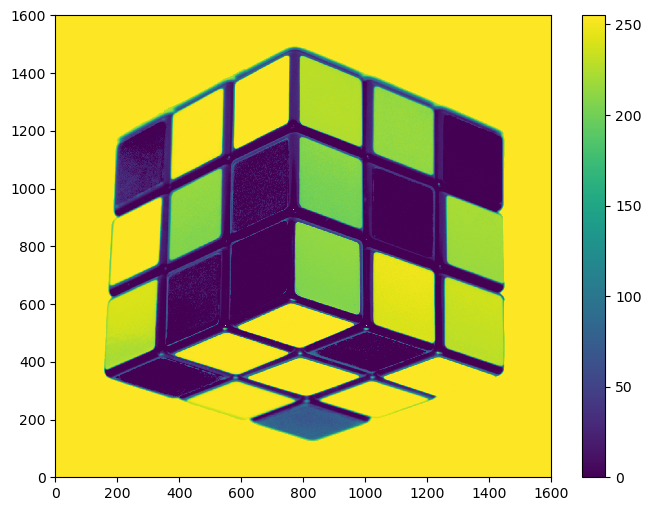

In [6]:
# Read image:

img = mpimg.imread("./Rubiks_cube.jpg")

print(img.shape)

# 2D image:

image_3 = img[:,:,0]
print(image_3.shape)

plt.figure(figsize = (8,6))

Z1 = plt.pcolor(image_3, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

### Fourier analysis:

In [7]:
fourier_3 = np.fft.fft2(image_3)

shifted_fourier_3 = np.fft.fftshift(fourier_3)

mask_3 = np.fft.fft2(Z)

shifted_mask_3 = np.fft.fftshift(mask_3)

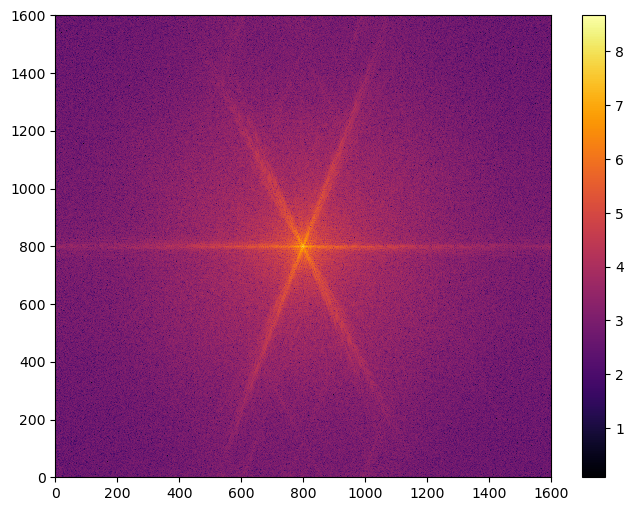

In [8]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(np.log10(np.abs(shifted_fourier_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


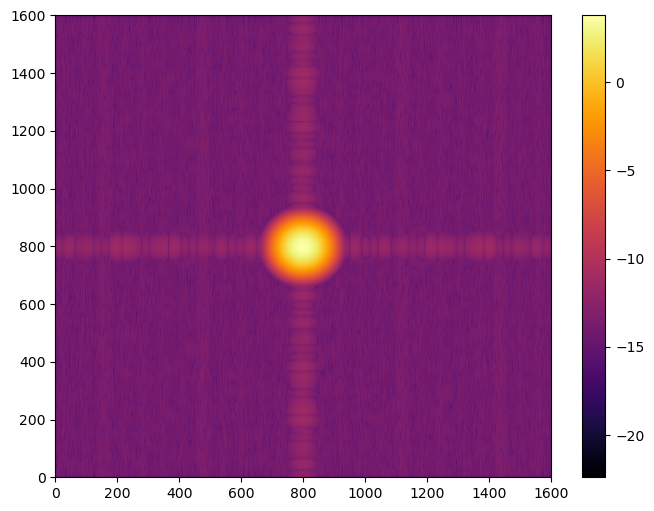

In [9]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(np.log10(np.abs(shifted_mask_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### MUltiply mask by fourier image:

In [10]:
masked_3 = shifted_fourier_3*shifted_mask_3

/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


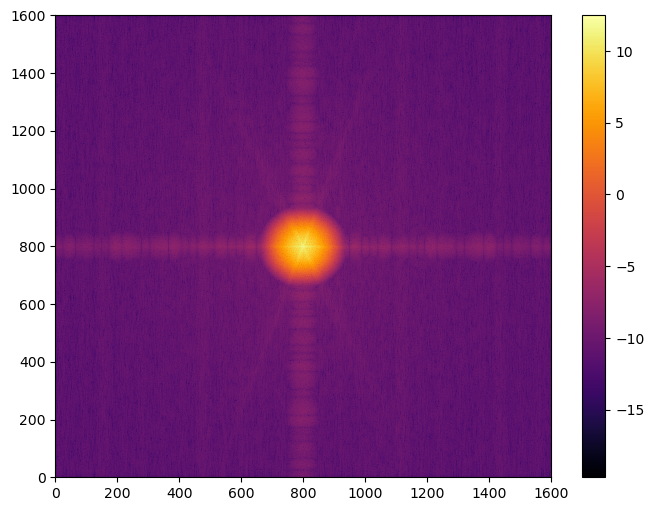

In [11]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(np.log10(np.abs(masked_3)), shading='auto', cmap ="inferno")

plt.colorbar(Z1)

plt.show()

### Inverse Fourier transform:


In [12]:
inv_filter_3 = np.fft.ifftshift(masked_3)
inv_filter_3 = np.fft.ifft2(inv_filter_3)

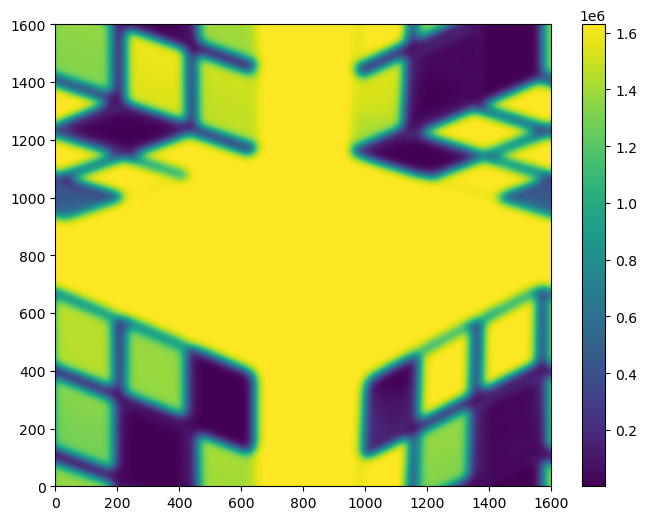

In [13]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(inv_filter_3.real, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()

In [14]:
inv_x = np.roll(inv_filter_3.real, inv_filter_3.shape[1]//2, axis = 1)
inv_xy = np.roll(inv_x, inv_filter_3.shape[0]//2, axis = 0)

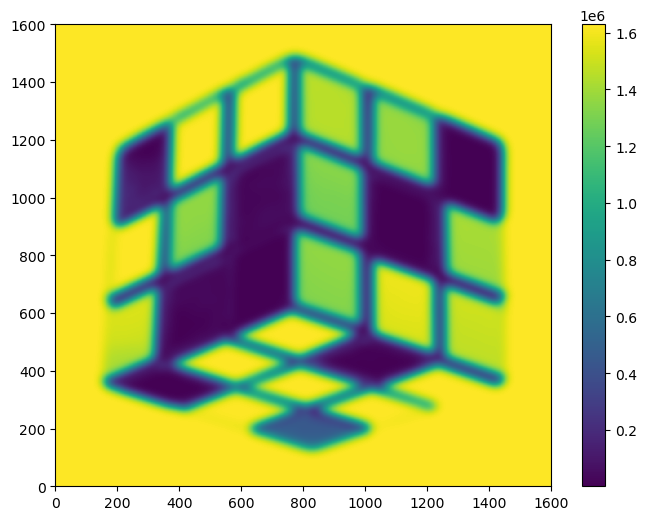

In [15]:
plt.figure(figsize = (8,6))

Z1 = plt.pcolor(inv_xy, shading='auto', cmap ="viridis")

plt.colorbar(Z1)

plt.show()
#plt.savefig("sigma10.png")